In [3]:
df=pd.read_csv("G:\datascience\layoffs_data.csv")

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df.isna().sum()

Company                         0
Location_HQ                     0
Industry                        0
Percentage                    919
Date                            0
Source                          0
Funds_Raised                  272
Stage                           0
Date_Added                      0
Country                         0
Laid_Off_Count                867
List_of_Employees_Laid_Off      1
dtype: int64

In [4]:
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year
inplace=True

In [5]:
df.head()

,Company,Location_HQ,Industry,Percentage,Date,Source,Funds_Raised,Stage,Date_Added,Country,Laid_Off_Count,List_of_Employees_Laid_Off,Year
0,IRL,SF Bay Area,Consumer,1.00,2023-06-23,https://www.theinformation.com/articles/social...,197.0,Series C,2023-06-25 23:04:16,United States,NaN,Unknown,2023
1,Retool,SF Bay Area,Other,0.09,2023-06-22,Internal memo,141.0,Series C,2023-06-22 14:23:40,United States,NaN,Unknown,2023
2,Anaplan,SF Bay Area,Other,NaN,2023-06-21,https://nypost.com/2023/06/23/software-giant-a...,300.0,Acquired,2023-06-24 03:48:00,United States,300.0,Unknown,2023
3,Uber,SF Bay Area,Transportation,NaN,2023-06-21,https://www.nasdaq.com/articles/uber-to-lay-of...,25200.0,Post-IPO,2023-06-22 00:19:03,United States,200.0,Unknown,2023
4,Tackle.io,Boise,Infrastructure,NaN,2023-06-21,https://tackle.io/blog/tackle-company-update/,148.0,Series C,2023-06-23 15:38:59,United States,75.0,Unknown,2023


In [6]:
df_yearwise=df.groupby('Year',as_index=False)['Laid_Off_Count'].sum()
df_yearwise

,Year,Laid_Off_Count
0,2020,80998.0
1,2021,15823.0
2,2022,164709.0
3,2023,210721.0


10.
 Let us check the year wise Layoffs


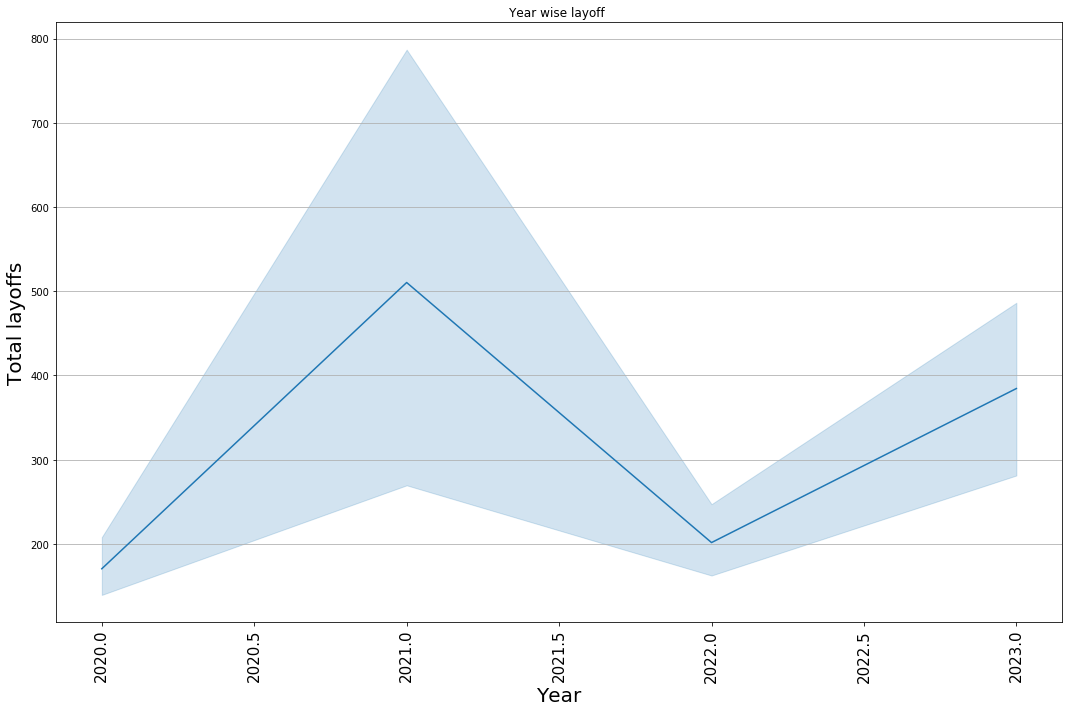

In [10]:
plt.figure(figsize=(15,10))


sns.lineplot(x='Year',y='Laid_Off_Count',data=df,dashes='--',markers='o')

plt.title('Year wise layoff ')
plt.xlabel('Year',fontsize=20)
plt.ylabel('Total layoffs',fontsize=20)
plt.xticks(fontsize=15,rotation = 90)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [16]:
Location=df.groupby(['Location_HQ']).size()
a=Location.sort_values(ascending=False)
a.head()

Location_HQ
SF Bay Area      691
New York City    284
Boston           123
Los Angeles      105
Bengaluru        105
dtype: int64

what are the top 10 Funds Raised company loaction

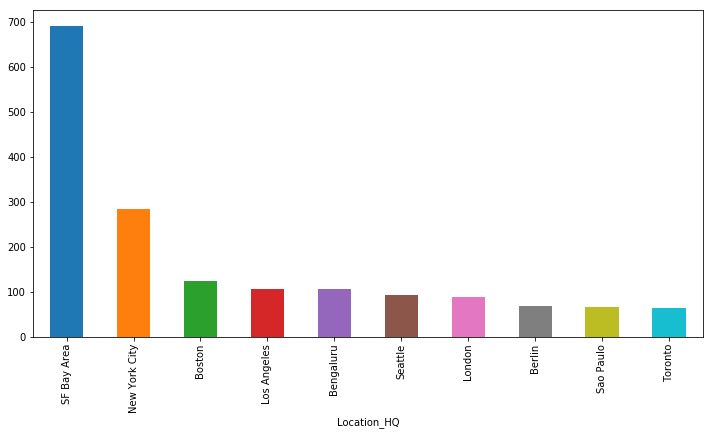

In [17]:
a.head(10).plot(kind='bar',x="Funds_Raised",figsize=(12,6),color=sns.color_palette())
plt.show()

 What are the least 10 head quarters located cities?


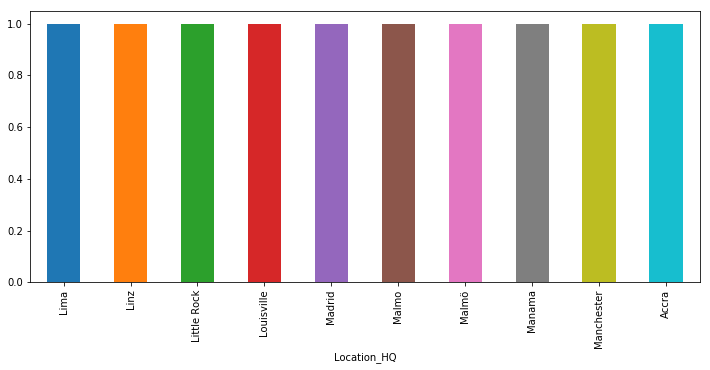

In [20]:
a.tail(10).plot(kind='bar',figsize=(12,5),color=sns.color_palette())

What is the percentage of top 10 head quarters?

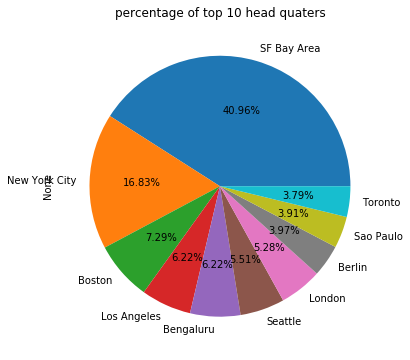

In [23]:
a.head(10).plot(kind='pie',autopct="%.2f%%",figsize=(6,6))
plt.title("percentage of top 10 head quaters")
plt.show()

In [24]:
df['count']=1
df_companies_with_max_layoff=df.groupby('Company')['Laid_Off_Count'].sum().sort_values(ascending=False).head(10).reset_index()
df_companies_with_max_layoff

,Company,Laid_Off_Count
0,Amazon,27150.0
1,Meta,21000.0
2,Google,12000.0
3,Microsoft,10158.0
4,Salesforce,10090.0
5,Philips,10000.0
6,Ericsson,8500.0
7,Flink,8100.0
8,Uber,7785.0
9,Micron,7200.0


Q11.
  Top 10 companies with maximum layoffs

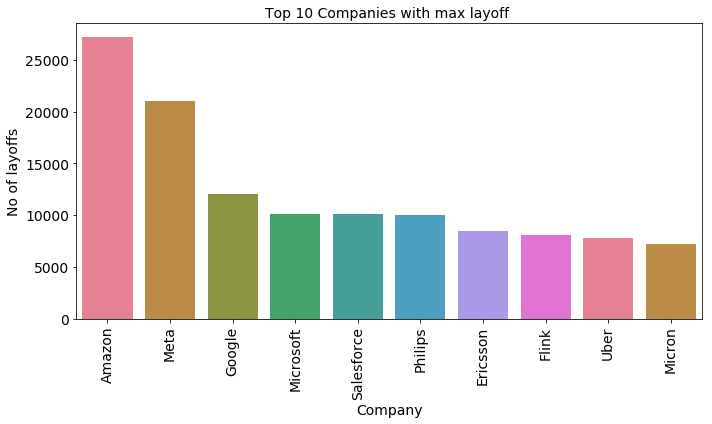

In [26]:
plt.figure(figsize=(10, 6))
palette=sns.color_palette("husl", 8)

sns.barplot(data=df_companies_with_max_layoff,x=df_companies_with_max_layoff['Company'],y=df_companies_with_max_layoff['Laid_Off_Count'],palette=palette,ci=0)
plt.xticks(rotation = 90)
plt.xlabel('Company',fontsize=14)
plt.ylabel('No of layoffs',fontsize=14)
plt.title("Top 10 Companies with max layoff ", fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.tight_layout()
plt.show()

In [27]:
df_companies=df.groupby(['Year','Company'],as_index=False)['Laid_Off_Count'].sum()
df_companies

,Year,Company,Laid_Off_Count
0,2020,1stdibs,70.0
1,2020,Acko,45.0
2,2020,Acorns,50.0
3,2020,Actifio,54.0
4,2020,AdRoll,210.0
5,2020,Ada Support,36.0
6,2020,Adara,0.0
7,2020,Agoda,1500.0
8,2020,Air,0.0
9,2020,AirMap,0.0


In [31]:
df_fund_raised=df.groupby('Company')[['Laid_Off_Count','Funds_Raised']].sum().sort_values(by='Laid_Off_Count',ascending=False).head(10)
df_fund_raised

,Laid_Off_Count,Funds_Raised
Company,,
Amazon,27150.0,432.0
Meta,21000.0,52000.0
Google,12000.0,26.0
Microsoft,10158.0,4.0
Salesforce,10090.0,260.4
Philips,10000.0,0.0
Ericsson,8500.0,663.0
Flink,8100.0,2000.0
Uber,7785.0,148700.0


Q12.
  Relationship B\W Funds received and Layoffs


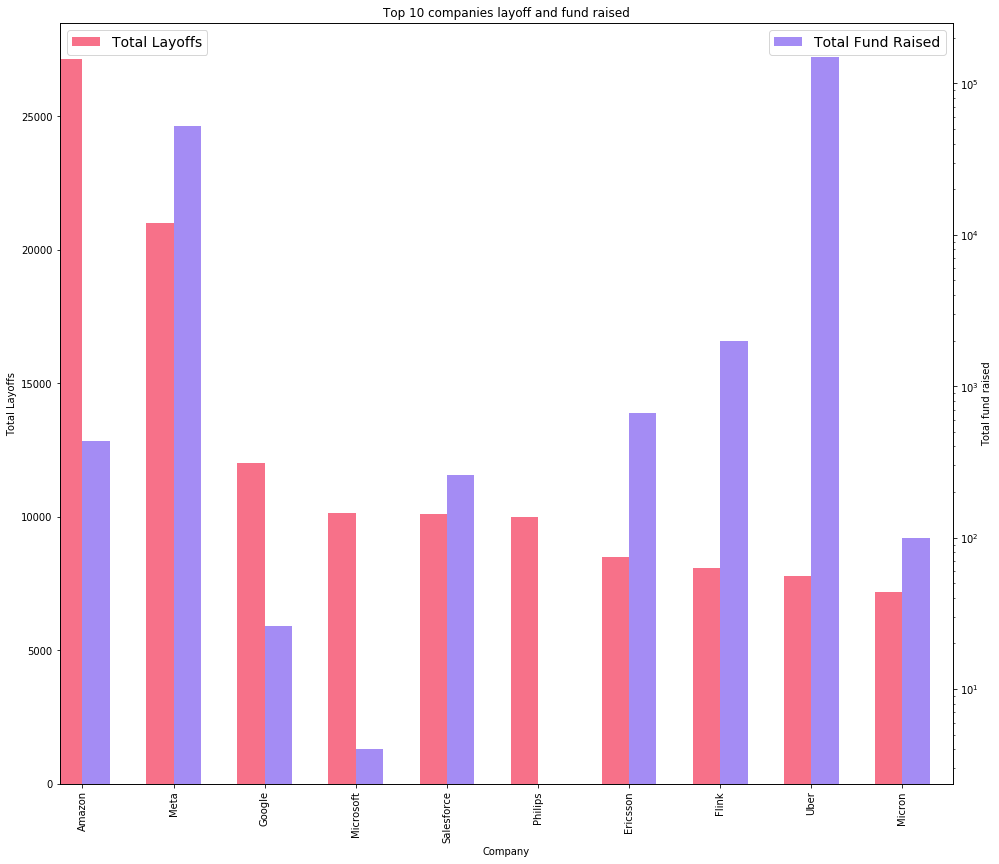

In [32]:
fig = plt.figure(figsize=(16,14)) # Create matplotlib figure

ax = fig.add_subplot(111) # Create matplotlib axes #000000 #400000 #800000  #bf0000
ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.

width = 0.3

df_fund_raised.Laid_Off_Count.plot(kind='bar', color='#f77189', ax=ax, width=width, position=1,label='Total Layoffs')
df_fund_raised.Funds_Raised.plot(kind='bar', color='#a48cf4', ax=ax2, width=width, position=0,label='Total Fund Raised')

plt.title('Top 10 companies layoff and fund raised')
ax.set_ylabel('Total Layoffs')
ax2.set_ylabel('Total fund raised')
plt.grid(False)
ax2.set_yscale('log')
ax.legend(loc='upper left',fontsize=14)
ax2.legend(loc='upper right',fontsize=14)
plt.show()


In [33]:
df_series=df[['Stage','Laid_Off_Count']]
df_series=df_series.groupby('Stage',as_index=False)['Laid_Off_Count'].sum().sort_values(by='Laid_Off_Count',ascending=False).reset_index(drop=True)
df_series

,Stage,Laid_Off_Count
0,Post-IPO,253901.0
1,Unknown,44267.0
2,Acquired,42092.0
3,Series B,26295.0
4,Series C,21655.0
5,Series D,20829.0
6,Series E,14043.0
7,Series F,11077.0
8,Private Equity,9267.0
9,Series H,7344.0


Q14.
  In which stage of company had the most Layoffs


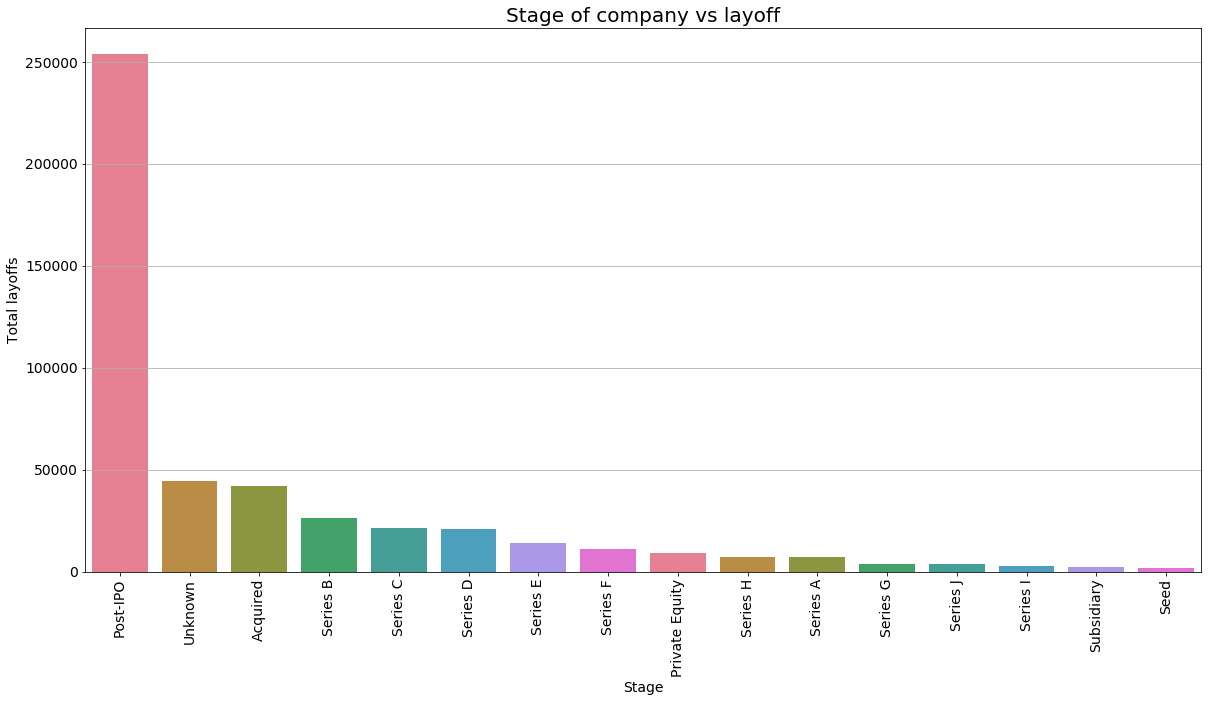

In [34]:
plt.figure(figsize=(20,10))


sns.barplot(x='Stage',y='Laid_Off_Count',data=df_series,palette=palette)

plt.title('Stage of company vs layoff',fontsize=20)
plt.xlabel('Stage',fontsize=14)
plt.ylabel('Total layoffs',fontsize=14)
plt.xticks(rotation = 90,fontsize=14)
plt.yticks(fontsize=14)
plt.grid(axis='y')
plt.show()

In [40]:
df_industry=df[['Industry','Laid_Off_Count']]
df_industry_sorted=df_industry.groupby('Industry',as_index=False)['Laid_Off_Count'].sum().sort_values(by='Laid_Off_Count',ascending=False).reset_index(drop=True)
df_industry_sorted

,Industry,Laid_Off_Count
0,Retail,57655.0
1,Consumer,56620.0
2,Other,40910.0
3,Transportation,40013.0
4,Food,35866.0
5,Finance,32656.0
6,Healthcare,32477.0
7,Hardware,25298.0
8,Real Estate,18482.0
9,Travel,18259.0


Q13.
  Industry wise Layoffs


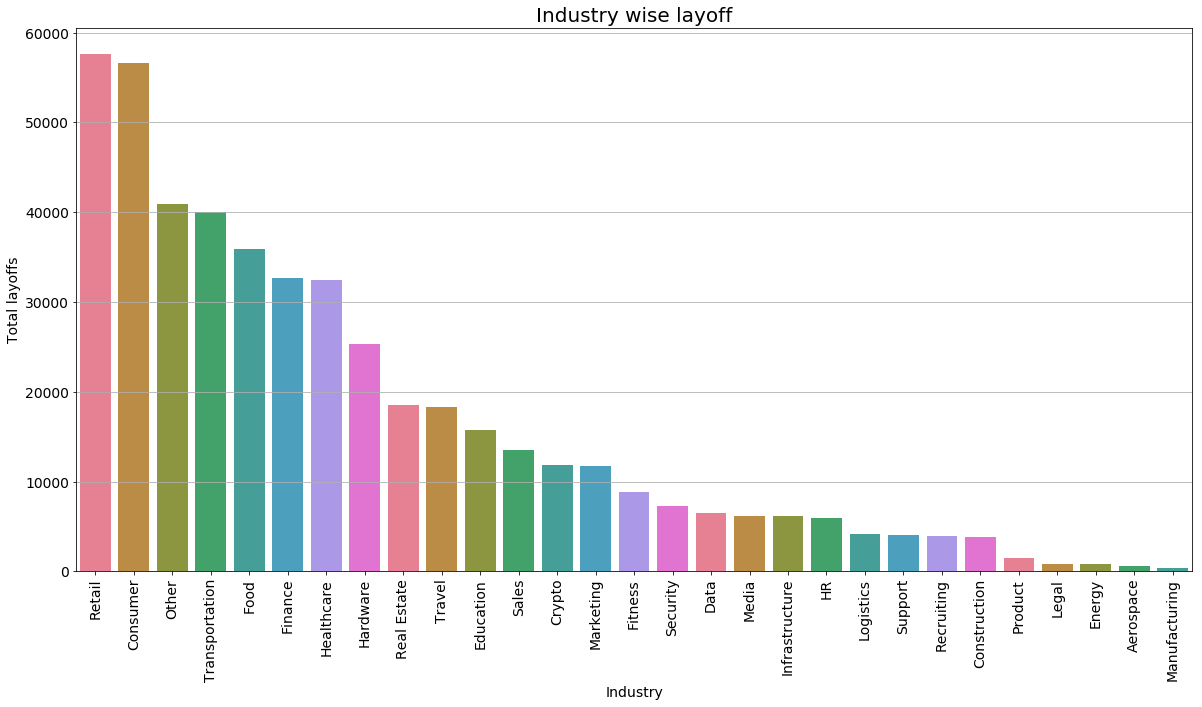

In [41]:
plt.figure(figsize=(20,10))

sns.barplot(x='Industry',y='Laid_Off_Count',data=df_industry_sorted,palette=palette)

plt.title('Industry wise layoff',fontsize=20)
plt.xlabel('Industry',fontsize=14)
plt.ylabel('Total layoffs',fontsize=14)
plt.xticks(rotation = 90,fontsize=14)
plt.yticks(fontsize=14)
plt.grid(axis='y')
plt.show()

In [43]:
df.shape

(2738, 14)

![](http://t3.ftcdn.net/jpg/02/92/36/76/360_F_292367633_TwzHFo2XLSSbcihgxESm2sKcQ0NlwrIG.jpg)